In [1]:
import tensorflow as tf
import numpy as np

In [2]:
np.random.seed(0)
def make_random_data():
    x = np.random.uniform(low=-2, high=4, size=200)
    y = []
    for t in x:
        r = np.random.normal(loc=0.0, scale=(0.5 + t*t/3), size=None)
        y.append(r)
    return x, 1.726*x -0.84 + np.array(y)
x, y = make_random_data()
x_train, y_train = x[:100], y[:100]
x_test, y_test = x[100:], y[100:]

In [3]:
g = tf.Graph()

In [4]:
with tf.Session(graph=g) as sess:
    new_saver = tf.train.import_meta_graph('./train-model.meta')
    new_saver.restore(sess, './train-model')
    y_pred = sess.run('y_hat:0', feed_dict={'tf_x:0': x_test})

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./train-model


In [5]:
print(y_pred[:, :3].flatten())

[ 2.111799  -0.7620687  2.5161436]


In [6]:
import matplotlib.pyplot as plt

In [7]:
x_arr = np.arange(-2, 4, 0.1)
g2 = tf.Graph()
with tf.Session(graph=g2) as sess:
    new_saver = tf.train.import_meta_graph('./train-model.meta')
    new_saver.restore(sess, './train-model')
    y_arr = sess.run('y_hat:0', feed_dict={'tf_x:0': x_arr})

INFO:tensorflow:Restoring parameters from ./train-model


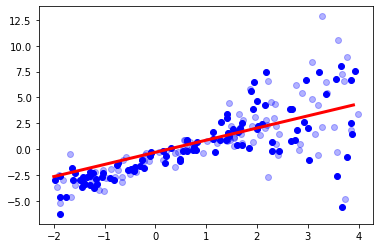

In [8]:
plt.figure()
plt.plot(x_train, y_train, 'bo')
plt.plot(x_test, y_test, 'bo', alpha=0.3)
plt.plot(x_arr, y_arr.T[:, 0], '-r', lw=3)
plt.show()